# Exercise: A Small Example for Linear Regression with Numpy

** A small scale example **


by 

[__Michael Granitzer__ (michael.granitzer@uni-passau.de)]( http://www.mendeley.com/profiles/michael-granitzer/)


__License__

This work is licensded under a [Creative Commons Attribution 3.0 Unported License](http://creativecommons.org/licenses/by/3.0/)


The table below describes four cars by their age and stopping distance for a full braking at 100km/h till stop

|Car	     |Age  |	Mileage	|Stopping Distance|
|------------|-----|------------|-----------------|
|Wartburg	 |5	   |30530	    |50|
|Moskvich	 |7	   |90000	    |79|
|Lada	     |15   |	159899	|124|
|Trabi	     |28   |	270564	|300|
|Average	 |13,75|137748,25	|138,25|

 

## Question 1: Determine the weights $w_i$ for the linear regression for the age variable.

We first create the data, than take the equation from the [lecture slides, pg 58-59](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-regression.pdf). The derivation from the equation can be found at the lecture notes from [Prof. Kirchner](http://seismo.berkeley.edu/~kirchner/eps_120/Toolkits/Toolkit_10.pdf)


In [16]:
#Creating the data and python setup
%pylab inline
#the data
x=np.array([[5,30530],[7,90000],[15,159899],[28,270564]])
y=np.array([50,79,124,300])
print "Independent variables:"
print x, type(x)
print "Dependent variable:"
print y, type(y)

Populating the interactive namespace from numpy and matplotlib
Independent variables:
[[     5  30530]
 [     7  90000]
 [    15 159899]
 [    28 270564]] <type 'numpy.ndarray'>
Dependent variable:
[ 50  79 124 300] <type 'numpy.ndarray'>


Estimating $w_0$ and $w_1$ is done as

$w_0=\bar{x}-w_1\bar{y}$

$w_1 =\frac{Cov(x,y)}{Var(x)}=\frac{\frac{1}{n} \sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\frac{1}{n}\sum_{i=1}^{n} (x_i-\bar{x})^2}$


In [17]:
def w0_estimate1D(x,y,w1):
    x_bar=np.average(x)
    y_bar=np.average(y)
    return y_bar-x_bar*w1

def w1_estimate1D(x,y):
    x_bar=np.average(x)
    y_bar=np.average(y)
    #note that multiplication between the two vector is pointwise
    return np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2)

w1=w1_estimate1D(x[:,0],y)
w0=w0_estimate1D(x[:,0],y,w1)
print w0, w1


-7.31905126243 10.5868400918


## Question 2: Draw a scatter plot of the data and the linear regression for a variable of your choice.


Now lets plot the results and the parameters. Did we do a correct calculation?


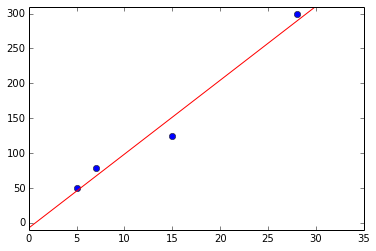

In [24]:
xlim((0,35))
ylim((-10,310))
plot(x[:,0],y,'o')
plot(np.arange(0,35,1),np.arange(0,35,1)*w1+w0,'-r')
show()

**Some Numpy details**
To see a little bit more of numpy's behaviour lets investigate the numpy details on that simple example:

In [5]:
#Calculating w1 covariance requires the sum of two vectors
x1d = x[:,0]
x_bar = np.average(x1d)
y_bar=np.average(y)
np.sum((x1d-x_bar)*(y-y_bar))
#we first calculate a new list containtin (x1d-x_bar)*(y-y_bar)
l = (x1d-x_bar)*(y-y_bar)
print 'pointwise multiplication',l.shape, l
#From this we take the sum.
print 'sum from pointwise multiplication',sum(l)

# A valid second approach would be using the inner product
# Note: inner product is multiplication and sum at once.
print 'inner product',(x1d-x_bar).dot((y-y_bar))


pointwise multiplication (4,) [  772.1875   399.9375   -17.8125  2304.9375]
sum from pointwise multiplication 3459.25
inner product 3459.25


## Question 3: Consider the mileage of the cars as an additional variable and estimate the regression parameters

So this requires us to use the matrix equation derived in [slide 60](http://www.uni-weimar.de/medien/webis/teaching/lecturenotes/machine-learning/unit-en-regression.pdf):

$$ w=(X^TX)^{-1}X^Ty $$

Note that we have to include a bias term below

In [7]:
import numpy.linalg as la
#include the bias term in the data
x=np.array([[1, 5,30530],[1,7,90000],[1,15,159899],[1,28,270564]])
y=np.array([50,79,124,300])
#now estimate parameters
w = la.inv(x.T.dot(x)).dot(x.T).dot(y)
print w

[ -6.42631756e+00   1.28163977e+01  -2.29034854e-04]


## Question 4: What are the pitfalls of the extrapolation

The model is linear, which means that extrapolation is not constrained. So given the example of a 40 year old car, it is unlikely that the distance to stop will increase beyond 300 meters. 

Moreover, there may not be a linear relationship at all between the age and the stopping distance. For example can a newly bought Travi stop in 3 meters (according to our first model) when it is new (1st year)? Most likely not, since not even a Formula 1 car could do it. 

Note however, that linear models can approximate non-linear ones in a small intervall, but not far beyond those intervals (think of a taylor series expansion of a function)



In [14]:
#car in its first year stops at
print "Car in its  year %f stops at %f meters"%(1,1*w1+w0)

Car in its  year 1.000000 stops at 3.267789 meters
